## Exercise 7

In [61]:
from sklearn.datasets import make_moons

In [62]:
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

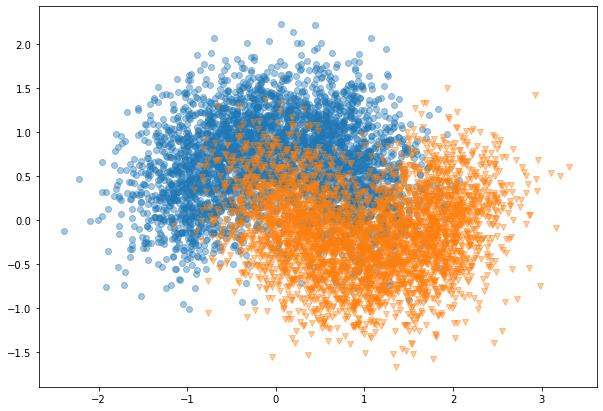

In [66]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train[y_train == 0][:,0], X_train[y_train==0][:,1], marker="o", alpha=0.4)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], marker="v", alpha=0.4)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
tree_clf = DecisionTreeClassifier(random_state=42)
params = {"max_depth":[5, 6, 7, 8, 9, 11], "min_samples_leaf":[1, 2, 5, 7, 10, 13, 15, 30, 60], "max_leaf_nodes":[23, 25,26,27,28, 30,35]}
grid_cv = GridSearchCV(tree_clf, param_grid=params, cv=6, n_jobs=6, verbose=2)
grid_cv.fit(X_train, y_train)

Fitting 6 folds for each of 378 candidates, totalling 2268 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 2268 out of 2268 | elapsed:   10.5s finished


GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=6,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 11],
                         'max_leaf_nodes': [23, 25, 26, 27, 28, 30, 35],
         

In [69]:
grid_cv.best_params_

{'max_depth': 8, 'max_leaf_nodes': 30, 'min_samples_leaf': 7}

In [70]:
best_est = grid_cv.best_estimator_

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [72]:
train_preds = best_est.predict(X_train)
accuracy_score(y_train, train_preds)

0.8716

In [73]:
test_preds = best_est.predict(X_test)
accuracy_score(y_test, test_preds)

0.8644

## Exercise 8

In [74]:
from sklearn.model_selection import ShuffleSplit

In [75]:
n_subsets = 1000
subset_size = 100
rs = ShuffleSplit(n_splits=n_subsets, train_size=subset_size, test_size=len(X_train) - subset_size, random_state=42)
subset_indices = []
for sp in rs.split(X_train):
    subset_indices.append(sp[0])

In [76]:
from sklearn.base import clone
import numpy as np

In [77]:
trees = [clone(grid_cv.best_estimator_) for _ in range(n_subsets)]
acc_scores=[]
for tree, subset in zip(trees, subset_indices):
    tree.fit(X_train[subset], y_train[subset])
    acc_scores.append(accuracy_score(y_train, tree.predict(X_train)))
print(np.mean(acc_scores))

0.7968772000000002


In [78]:
from scipy.stats import mode

In [79]:
forest_predicts = [tree.predict(X_test) for tree in trees]
mode_pred = mode(forest_predicts, axis=0)

In [80]:
accuracy_score(y_test, mode_pred[0][0])



0.8648